In [138]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [139]:
movies = pd.read_csv('Datasets/tmdb_5000_movies.csv')
credits = pd.read_csv('Datasets/tmdb_5000_credits.csv')

In [140]:
movies['genres'] = movies['genres'].apply(json.loads)
for index, i in zip(movies.index, movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index, 'genres']

movies['keywords'] = movies['keywords'].apply(json.loads)
for index, i in zip(movies.index, movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index, 'keywords'] = str(list1)

movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index, i in zip(movies.index, movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index, 'production_companies'] = str(list1)

credits['cast'] = credits['cast'].apply(json.loads)
for index, i in zip(credits.index, credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index, 'cast'] = str(list1)

credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'}, inplace=True)

In [141]:
movies = movies.merge(credits, left_on = 'id', right_on = 'movie_id', how = 'left')
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'director', 'keywords']]

In [142]:
movies['genres'] = movies['genres'].apply(lambda x: sorted(x, key=lambda genre: genre['name']))
movies['genres'] = movies['genres'].apply(lambda x: ','.join(genre['name'] for genre in x))
movies['genres'] = movies['genres'].str.split(',')

genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
genres_bin = movies['genres_bin']
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [143]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

In [144]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [145]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [146]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [147]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
cast_bin = movies['cast_bin']
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

In [148]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

In [149]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [150]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [151]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
director_bin = movies['director_bin']
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [152]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [153]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]

    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [154]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [155]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']
words_bin = movies['words_bin']

# We will we using Cosine Similarity for finding the similarity between 2 movies.

In [156]:
def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [157]:
Similarity(3,160)

2.568603127495341

In [158]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              AnneHathaway,ChristianBale,GaryOldman,MichaelC...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          [batman, burglar, catburglar, catwoman, cover-...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Action, Adventure, Animation, Comedy, Family,...
cast                 Gera

In [159]:
new_id = list(range(0, movies.shape[0]))
movies['new_id'] = new_id
movies = movies[['original_title', 'genres', 'vote_average', 'genres_bin', 'cast_bin' , 'new_id' , 'director' , 'director_bin' , 'words_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, Science Fiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [161]:
X = movies[['new_id']]
y = movies['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.3)

knn_regressor = KNeighborsRegressor(20)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [162]:
y_pred = knn_regressor.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.9716214091321439


In [163]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.9857085822554981


In [164]:
y_pred = knn_regressor.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

0.7664922890837617


In [165]:
from sklearn.metrics import precision_score, recall_score

threshold_low = 5.0
threshold_high = 7.0

y_pred_class = np.where(y_pred >= threshold_high, 2, np.where(y_pred >= threshold_low, 1, 0))
y_test_class = np.where(y_test >= threshold_high, 2, np.where(y_test >= threshold_low, 1, 0))

precision = precision_score(y_test_class, y_pred_class, average='macro')
recall = recall_score(y_test_class, y_pred_class, average='macro')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.23011793166011493
Recall: 0.3333333333333333


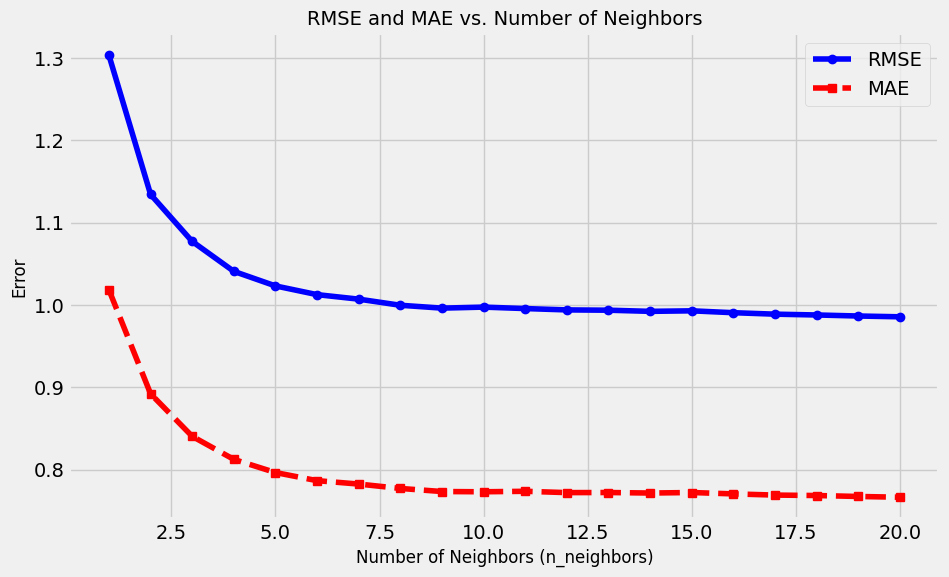

In [166]:
n_neighbors_values = list(range(1, 21)) 

rmse_values = []
mae_values = []

n_neighbors_values = list(range(1, 21))

rmse_values = []
mae_values = []

for n in n_neighbors_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
    knn_regressor.fit(X_train, y_train)
    
    y_pred = knn_regressor.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    rmse_values.append(rmse)
    mae_values.append(mae)

plt.figure(figsize=(10, 6))

plt.plot(n_neighbors_values, rmse_values, label='RMSE', marker='o', linestyle='-', color='b')

plt.plot(n_neighbors_values, mae_values, label='MAE', marker='s', linestyle='--', color='r')

plt.title('RMSE and MAE vs. Number of Neighbors', fontsize=14)
plt.xlabel('Number of Neighbors (n_neighbors)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

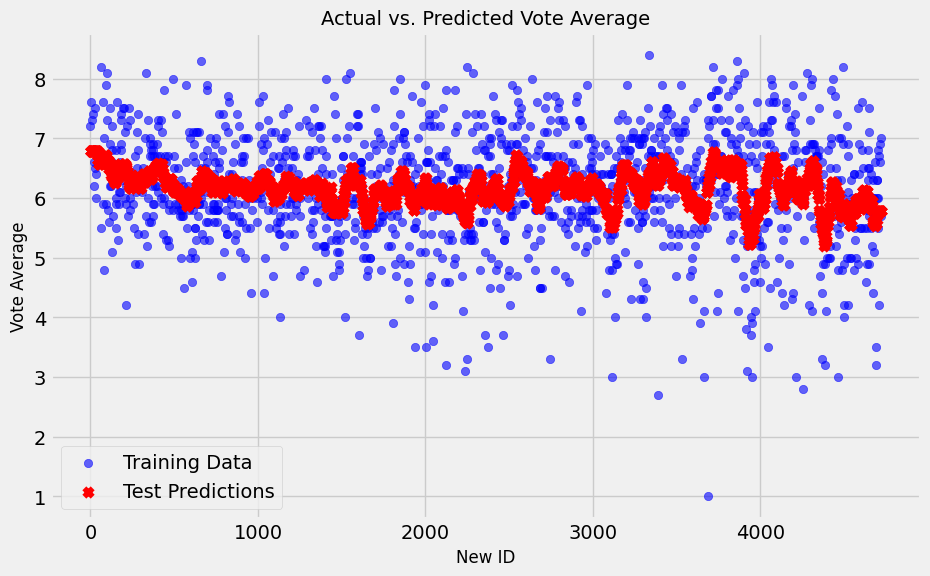

In [167]:
sorted_indices_train = X_train['new_id'].argsort()
X_train_sorted = X_train.iloc[sorted_indices_train]
y_train_sorted = y_train.iloc[sorted_indices_train]

sorted_indices_test = X_test['new_id'].argsort()
X_test_sorted = X_test.iloc[sorted_indices_test]
y_pred_sorted = y_pred[sorted_indices_test]

plt.figure(figsize=(10, 6))

plt.scatter(X_train_sorted['new_id'], y_train_sorted, label="Training Data", color="blue", alpha=0.6)

plt.scatter(X_test_sorted['new_id'], y_pred_sorted, label="Test Predictions", color="red", marker="x")

plt.xlabel("New ID", fontsize=12)
plt.ylabel("Vote Average", fontsize=12)
plt.title("Actual vs. Predicted Vote Average", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [168]:
def predict_score(name):
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie : ', new_movie.original_title.values[0])
    
    def getNeighbors(baseMovie, K):
        distances = []

        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))

        distances.sort(key = operator.itemgetter(1))
        neighbors = []

        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)

    print('\nRecommended Movies : \n')
    for neighbor in neighbors:
        avgRating = avgRating + movies.iloc[neighbor[0]][2]
        print(movies.iloc[neighbor[0]][0]+ " | Genres : "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ', '')+ 
              " | Rating : "+str(movies.iloc[neighbor[0]][2]))
    print("\n")
    avgRating = avgRating / K
    predicted_rating = np.full_like(new_movie['vote_average'], avgRating)

    actual_rating = new_movie['vote_average']
    
    print('The predicted rating for %s is : %f' %(new_movie['original_title'].values[0], predicted_rating))
    print('The actual rating for %s is : %f' %(new_movie['original_title'].values[0], actual_rating))

In [169]:
predict_score('Godfather')

Selected Movie :  The Godfather: Part III

Recommended Movies : 

The Rainmaker | Genres : 'Crime','Drama','Thriller' | Rating : 6.7
The Godfather: Part II | Genres : 'Crime','Drama' | Rating : 8.3
The Godfather | Genres : 'Crime','Drama' | Rating : 8.4
The Outsiders | Genres : 'Crime','Drama' | Rating : 6.9
Absolute Power | Genres : 'Crime','Drama','Thriller' | Rating : 6.4
The Talented Mr. Ripley | Genres : 'Crime','Drama','Thriller' | Rating : 7.0
The Cotton Club | Genres : 'Crime','Drama','Music','Romance' | Rating : 6.6
End of Watch | Genres : 'Crime','Drama','Thriller' | Rating : 7.2
Only God Forgives | Genres : 'Crime','Drama','Thriller' | Rating : 5.6
Hannibal Rising | Genres : 'Crime','Drama','Thriller' | Rating : 6.0


The predicted rating for The Godfather: Part III is : 6.910000
The actual rating for The Godfather: Part III is : 7.100000
